# Classification Analysis for Diabetes Prediction

## About this file

The `diabetes_prediction_dataset.csv` file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

## Objective for Classification Model Training:

The primary objective of the diabetes classification analysis is to develop an accurate and interpretable machine learning model that predicts the likelihood of diabetes based on medical and demographic data. The aim is to create a reliable tool for healthcare professionals to identify individuals at risk of diabetes, utilizing features such as age, gender, BMI, hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The analysis involves training and optimizing a predictive model, assessing its generalization on validation data, identifying key predictive features, and ensuring interpretability. Additionally, the objective extends to providing actionable insights for healthcare practitioners, exploring correlations in the dataset, and addressing potential imbalances in positive and negative diabetes cases. Ultimately, the goal is to contribute to personalized treatment plans and enhance the understanding of relationships between various factors and the likelihood of developing diabetes.

## Training Models:

- Logistic Regression
- XGBoost
- Random Forest
- Decision Tree
- k-NN
- SVM

# Environment Preparation

## Import software libraries

In [1]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import seaborn as sns 
import matplotlib.pyplot as plt
import category_encoders as ce                              # Encode data.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            roc_curve, \
                            precision_recall_curve, \
                            ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import imblearn                                             # Deal with imbalanced data.
from imblearn.over_sampling import SMOTE                    # Perform oversampling.
from collections import Counter                             # Count objects in containers.
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Category Encoders {}'.format(ce.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))
print('- imbalanced-learn {}\n'.format(imblearn.__version__))

Libraries used in this project:
- Python 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.23.5
- pandas 1.5.3
- Matplotlib 3.7.0
- Seaborn 0.12.2
- Category Encoders 2.6.3
- scikit-learn 1.2.2
- XGBoost 2.0.2
- imbalanced-learn 0.10.1



# Data Preparation

## Load and preview the data

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(R"C:\Users\Dell\Downloads\classification\Diabetes prediction dataset\diabetes_prediction_dataset.csv")
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Check the shape of the data

In [3]:
data.shape

(100000, 9)

## Check the unique number of columns

In [4]:
data.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

## Check the data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Check for correlations

In [6]:
data.corr().abs()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


## Generate summary statistics for all of the data

In [7]:
data.describe(datetime_is_numeric = True, include = 'all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


## Count column values

In [8]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for gender:
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Value counts for age:
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

Value counts for hypertension:
0    92515
1     7485
Name: hypertension, dtype: int64

Value counts for heart_disease:
0    96058
1     3942
Name: heart_disease, dtype: int64

Value counts for smoking_history:
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

Value counts for bmi:
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64

Value counts for HbA1c_level:
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8

# Data Cleaning

## Convertion of data types 

In [9]:
column_to_convert = ['hypertension', 'heart_disease', 'diabetes']
data[column_to_convert] = data[column_to_convert].astype(bool)

data['age'] = data['age'].replace(',', '', regex=True).astype('int64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  bool   
 3   heart_disease        100000 non-null  bool   
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  bool   
dtypes: bool(3), float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [11]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,False,True,never,25.19,6.6,140,False
1,Female,54,False,False,No Info,27.32,6.6,80,False
2,Male,28,False,False,never,27.32,5.7,158,False
3,Female,36,False,False,current,23.45,5.0,155,False
4,Male,76,True,True,current,20.14,4.8,155,False


## Plot histograms for all numerical columns

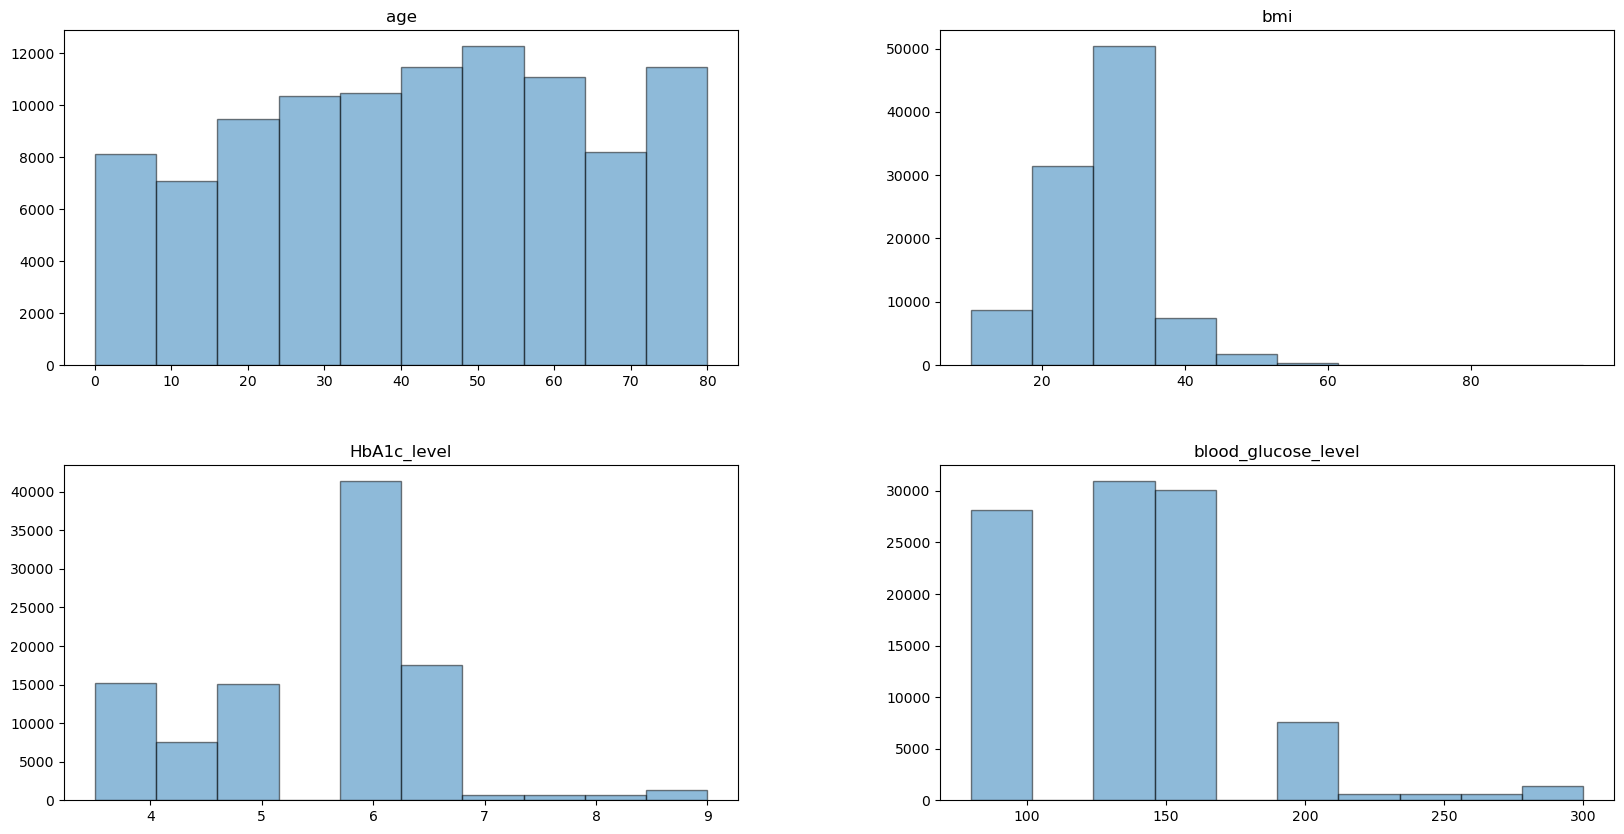

In [12]:
data_for_hist = data.select_dtypes(exclude = ['bool'])
data_for_hist.hist(figsize = (20, 10), alpha = 0.5, edgecolor = 'black', grid = False);

## Generate a box plot for `age`

In [13]:
data['age'].describe()

count    100000.000000
mean         41.875660
std          22.535417
min           0.000000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

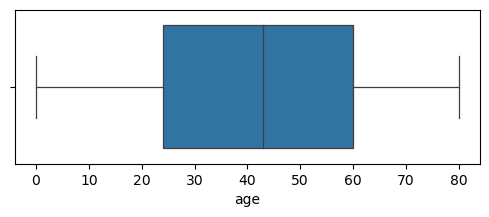

In [14]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = data['age'], linewidth = 0.9);

## Identify outlier

In [15]:
q1 = np.percentile(data['age'], 25)
q3 = np.percentile(data['age'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

print('Lower bound:', round(lb, 2))
print('Upper bound:', round(ub, 2))

Lower bound: -30.0
Upper bound: 114.0


In [16]:
print('Number of patients with age greater than UB:',
      data[(data['age'] >= ub)].shape[0])
print('Number of patients with age lower than LB:  ',
      data[(data['age'] <= lb)].shape[0])

Number of patients with age greater than UB: 0
Number of patients with age lower than LB:   0


## Generate bar charts for `gender`

In [17]:
gender_dist = data['gender'].value_counts(dropna = False)
gender_dist

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

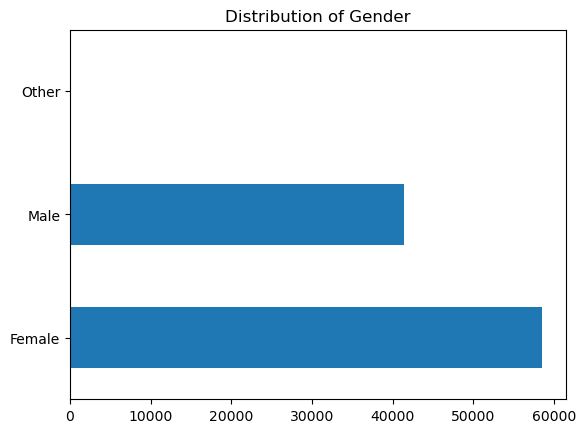

In [18]:
gender_dist.plot(kind = 'barh')
plt.title('Distribution of Gender');

## Drop `Other` in `gender`

In [19]:
data.drop(data[data['gender'] == 'Other'].index, inplace=True)

In [20]:
gender_dist = data['gender'].value_counts(dropna = False)
gender_dist

Female    58552
Male      41430
Name: gender, dtype: int64

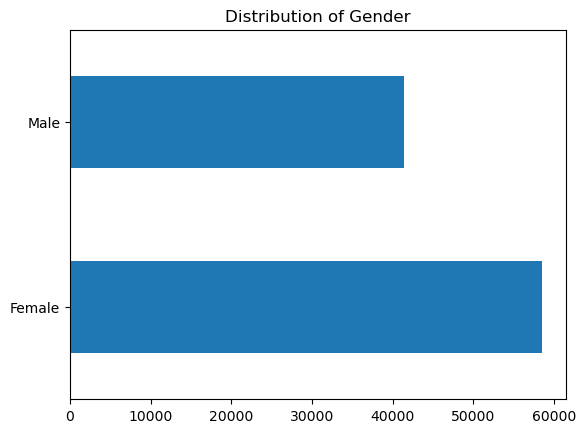

In [21]:
gender_dist.plot(kind = 'barh')
plt.title('Distribution of Gender');

## Generate bar charts for `smoking_history`

In [22]:
smoking_history_dist = data['smoking_history'].value_counts(dropna = False)
smoking_history_dist

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

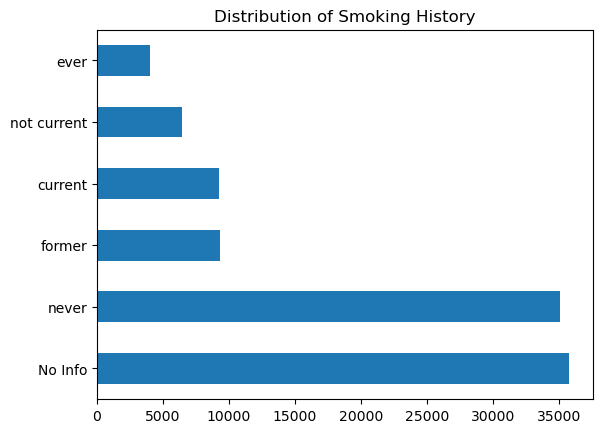

In [23]:
smoking_history_dist.plot(kind = 'barh')
plt.title('Distribution of Smoking History');

In [24]:
mapping = {
    'No Info': 'undeclared',
    'never': 'non_smoker',
    'former': 'former_smoker',
    'current': 'smoker',
    'not current': 'former_smoker',
    'ever': 'former_smoker'
}

# Replace values based on the mapping dictionary
data['smoking_history'].replace(mapping, inplace=True)

In [25]:
smoking_history_dist = data['smoking_history'].value_counts(dropna = False)
smoking_history_dist

undeclared       35810
non_smoker       35092
former_smoker    19794
smoker            9286
Name: smoking_history, dtype: int64

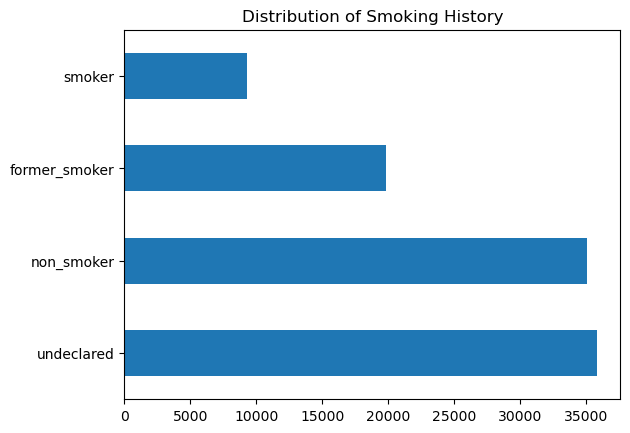

In [26]:
smoking_history_dist.plot(kind = 'barh')
plt.title('Distribution of Smoking History');

In [27]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,False,True,non_smoker,25.19,6.6,140,False
1,Female,54,False,False,undeclared,27.32,6.6,80,False
2,Male,28,False,False,non_smoker,27.32,5.7,158,False
3,Female,36,False,False,smoker,23.45,5.0,155,False
4,Male,76,True,True,smoker,20.14,4.8,155,False


## Generate bar charts for `hypertension`

In [28]:
hypertension_dist = data['hypertension'].value_counts(dropna = False)
hypertension_dist

False    92497
True      7485
Name: hypertension, dtype: int64

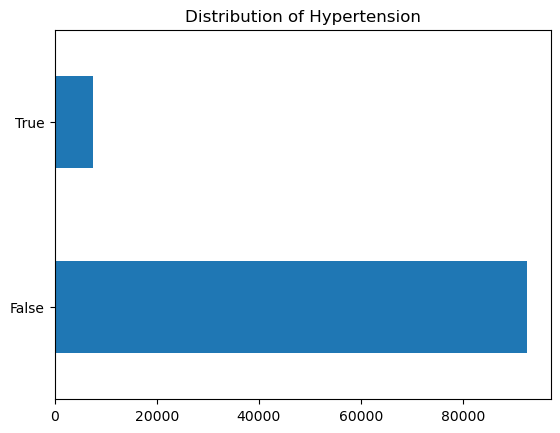

In [29]:
hypertension_dist.plot(kind = 'barh')
plt.title('Distribution of Hypertension');

## Generate bar charts for `heart_disease`

In [30]:
heart_disease_dist = data['heart_disease'].value_counts(dropna = False)
heart_disease_dist

False    96040
True      3942
Name: heart_disease, dtype: int64

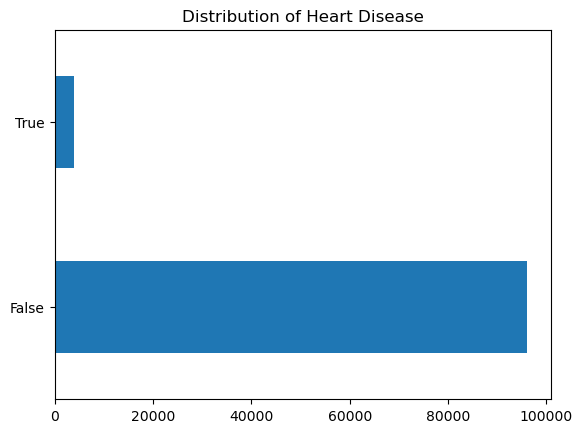

In [31]:
heart_disease_dist.plot(kind = 'barh')
plt.title('Distribution of Heart Disease');

## Generate bar charts for `diabetes`

In [32]:
diabetes_dist = data['diabetes'].value_counts(dropna = False)
diabetes_dist

False    91482
True      8500
Name: diabetes, dtype: int64

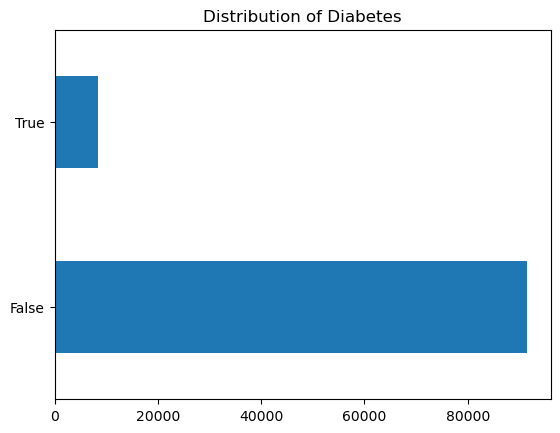

In [33]:
diabetes_dist.plot(kind = 'barh')
plt.title('Distribution of Diabetes');

## Check Updated Data Details

In [34]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for gender:
Female    58552
Male      41430
Name: gender, dtype: int64

Value counts for age:
80    5621
51    1619
47    1572
48    1568
49    1541
      ... 
76     733
77     730
75     721
78     682
79     621
Name: age, Length: 81, dtype: int64

Value counts for hypertension:
False    92497
True      7485
Name: hypertension, dtype: int64

Value counts for heart_disease:
False    96040
True      3942
Name: heart_disease, dtype: int64

Value counts for smoking_history:
undeclared       35810
non_smoker       35092
former_smoker    19794
smoker            9286
Name: smoking_history, dtype: int64

Value counts for bmi:
27.32    25488
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
53.28        1
55.38        1
40.26        1
51.75        1
60.52        1
Name: bmi, Length: 4247, dtype: int64

Value counts for HbA1c_level:
6.6    8537
5.7    8412
6.5    8362
5.8    8321
6.0    8294
6.2    8267
6.1    8044
3.5    7659
4.8    7597
4.5    7584
4.0 

In [35]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,False,True,non_smoker,25.19,6.6,140,False
1,Female,54,False,False,undeclared,27.32,6.6,80,False
2,Male,28,False,False,non_smoker,27.32,5.7,158,False
3,Female,36,False,False,smoker,23.45,5.0,155,False
4,Male,76,True,True,smoker,20.14,4.8,155,False
...,...,...,...,...,...,...,...,...,...
99995,Female,80,False,False,undeclared,27.32,6.2,90,False
99996,Female,2,False,False,undeclared,17.37,6.5,100,False
99997,Male,66,False,False,former_smoker,27.83,5.7,155,False
99998,Female,24,False,False,non_smoker,35.42,4.0,100,False


In [36]:
data.shape

(99982, 9)

# Data Preprocessing

## Identify categorical features

In [37]:
categorical_columns = list(data.select_dtypes(['object']).columns)

print('The number of categorical features:',
      len(categorical_columns))
print('The names of categorical features:',
      categorical_columns)

The number of categorical features: 2
The names of categorical features: ['gender', 'smoking_history']


## One-hot encoding for all categorical features

In [38]:
cols = ['gender', 'smoking_history']

encoder = ce.OneHotEncoder(cols = cols,
                           return_df = True,
                           use_cat_names = True)

In [39]:
# Fit and transform data.

data_encoded = encoder.fit_transform(data)

# Preview the data.

data_encoded.head()

,gender_Female,gender_Male,age,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0,80,False,True,1,0,0,0,25.19,6.6,140,False
1,1,0,54,False,False,0,1,0,0,27.32,6.6,80,False
2,0,1,28,False,False,1,0,0,0,27.32,5.7,158,False
3,1,0,36,False,False,0,0,1,0,23.45,5.0,155,False
4,0,1,76,True,True,0,0,1,0,20.14,4.8,155,False


## Discretize `age` into bins

In [40]:
data_encoded.age.describe()

count    99982.000000
mean        41.877878
std         22.535787
min          0.000000
25%         24.000000
50%         43.000000
75%         60.000000
max         80.000000
Name: age, dtype: float64

In [41]:
# Define age bins and labels.

bins = [0, 20, 40, 60, 81]
labels = ['0–19', '20–39', '40-59',
          '60-80']

# Perform binning using bin list.

data_encoded['age_group'] = pd.cut(data_encoded['age'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['age_group_encoded'] = data_encoded['age_group'].cat.codes

In [42]:
age_vars = ['age_group_encoded', 'age_group', 'age']

data_encoded[age_vars].sample(10)

,age_group_encoded,age_group,age
44617,1,20–39,39
51828,1,20–39,23
43479,1,20–39,25
31034,3,60-80,75
96743,1,20–39,27
32042,2,40-59,47
66499,3,60-80,80
41578,3,60-80,62
27714,0,0–19,17
35843,0,0–19,18


## Plot the new distribution of `age`

In [43]:
age_dist = data_encoded.age_group.value_counts()

age_dist

40-59    29452
20–39    25814
60-80    25055
0–19     19661
Name: age_group, dtype: int64

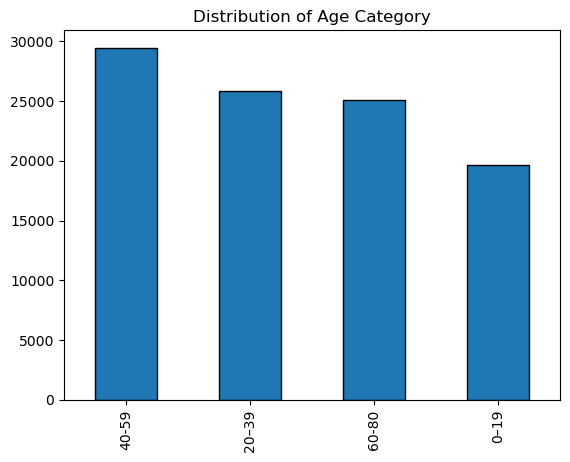

In [44]:
age_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Age Category');

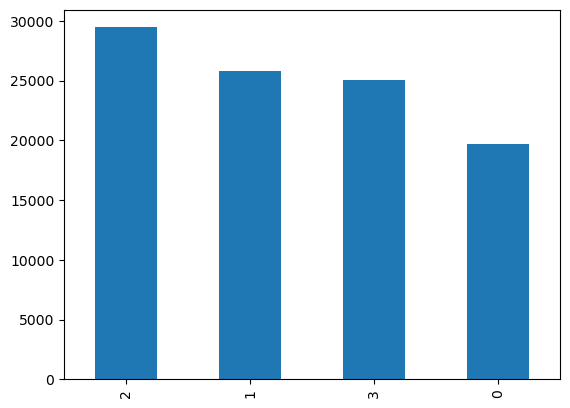

In [45]:
# Check against encoded values.
data_encoded.age_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `age` and `age_group` variables

In [46]:
data_encoded.drop(['age', 'age_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Female',
 'gender_Male',
 'hypertension',
 'heart_disease',
 'smoking_history_non_smoker',
 'smoking_history_undeclared',
 'smoking_history_smoker',
 'smoking_history_former_smoker',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes',
 'age_group_encoded']

In [47]:
data_encoded.head(5)

,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group_encoded
0,1,0,False,True,1,0,0,0,25.19,6.6,140,False,3
1,1,0,False,False,0,1,0,0,27.32,6.6,80,False,2
2,0,1,False,False,1,0,0,0,27.32,5.7,158,False,1
3,1,0,False,False,0,0,1,0,23.45,5.0,155,False,1
4,0,1,True,True,0,0,1,0,20.14,4.8,155,False,3


## Discretize `bmi` into bins

In [48]:
data_encoded.bmi.describe()

count    99982.000000
mean        27.320757
std          6.636853
min         10.010000
25%         23.630000
50%         27.320000
75%         29.580000
max         95.690000
Name: bmi, dtype: float64

In [49]:
# Define age bins and labels.

bins = [5, 18.5, 25.0, 30.0, 96]
labels = ['5–18.49', '18.5–24.99', '25.0-29.99',
          '30-96']

# Perform binning using bin list.

data_encoded['bmi_group'] = pd.cut(data_encoded['bmi'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['bmi_group_encoded'] = data_encoded['bmi_group'].cat.codes

In [50]:
bmi_vars = ['bmi_group_encoded', 'bmi_group', 'bmi']

data_encoded[bmi_vars].sample(10)

,bmi_group_encoded,bmi_group,bmi
92434,2,25.0-29.99,27.32
53990,3,30-96,35.61
59757,2,25.0-29.99,28.46
52121,1,18.5–24.99,20.24
74723,3,30-96,39.37
69668,2,25.0-29.99,25.63
41207,1,18.5–24.99,22.35
53604,2,25.0-29.99,26.70
89098,2,25.0-29.99,27.11
11887,2,25.0-29.99,27.32


## Plot the new distribution of `bmi`

In [51]:
bmi_dist = data_encoded.bmi_group.value_counts()

bmi_dist

25.0-29.99    45744
30-96         23530
18.5–24.99    22216
5–18.49        8492
Name: bmi_group, dtype: int64

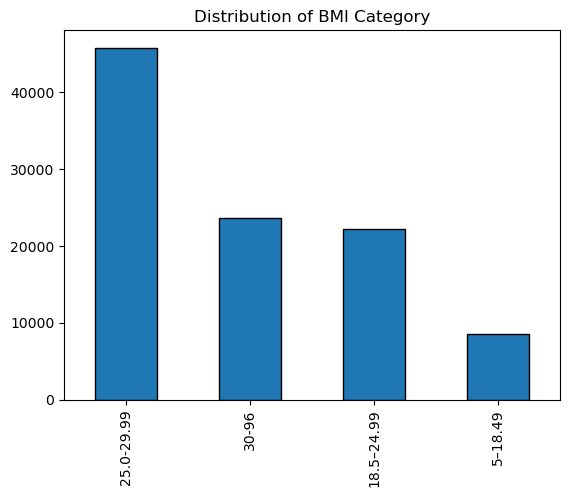

In [52]:
bmi_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of BMI Category');

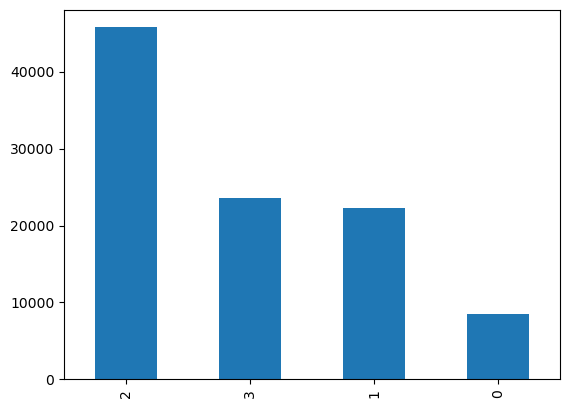

In [53]:
# Check against encoded values.
data_encoded.bmi_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `bmi` and `bmi_group` variables

In [54]:
data_encoded.drop(['bmi', 'bmi_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Female',
 'gender_Male',
 'hypertension',
 'heart_disease',
 'smoking_history_non_smoker',
 'smoking_history_undeclared',
 'smoking_history_smoker',
 'smoking_history_former_smoker',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes',
 'age_group_encoded',
 'bmi_group_encoded']

In [55]:
data_encoded.head(5)

,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,HbA1c_level,blood_glucose_level,diabetes,age_group_encoded,bmi_group_encoded
0,1,0,False,True,1,0,0,0,6.6,140,False,3,2
1,1,0,False,False,0,1,0,0,6.6,80,False,2,2
2,0,1,False,False,1,0,0,0,5.7,158,False,1,2
3,1,0,False,False,0,0,1,0,5.0,155,False,1,1
4,0,1,True,True,0,0,1,0,4.8,155,False,3,1


## Plot the new distribution of `HbA1c_level`

In [56]:
data_encoded.HbA1c_level.describe()

count    99982.000000
mean         5.527529
std          1.070665
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

In [57]:
# Define age bins and labels.

bins = [3, 5.7, 6.5, 10]
labels = ['3.00–5.69', '5.70–6.49', '6.50-10']

# Perform binning using bin list.

data_encoded['HbA1c_level_group'] = pd.cut(data_encoded['HbA1c_level'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['HbA1c_level_group_encoded'] = data_encoded['HbA1c_level_group'].cat.codes

In [58]:
HbA1c_level_vars = ['HbA1c_level_group_encoded', 'HbA1c_level_group', 'HbA1c_level']

data_encoded[HbA1c_level_vars].sample(10)

,HbA1c_level_group_encoded,HbA1c_level_group,HbA1c_level
881,0,3.00–5.69,3.5
6792,0,3.00–5.69,5.0
4179,0,3.00–5.69,3.5
47675,2,6.50-10,6.6
27462,2,6.50-10,6.6
32883,1,5.70–6.49,5.8
3807,0,3.00–5.69,4.8
64205,1,5.70–6.49,6.1
85884,0,3.00–5.69,3.5
61439,1,5.70–6.49,6.0


## Plot the new distribution of `HbA1c_level`

In [59]:
HbA1c_level_dist = data_encoded.HbA1c_level_group.value_counts()

HbA1c_level_dist

5.70–6.49    41338
3.00–5.69    37850
6.50-10      20794
Name: HbA1c_level_group, dtype: int64

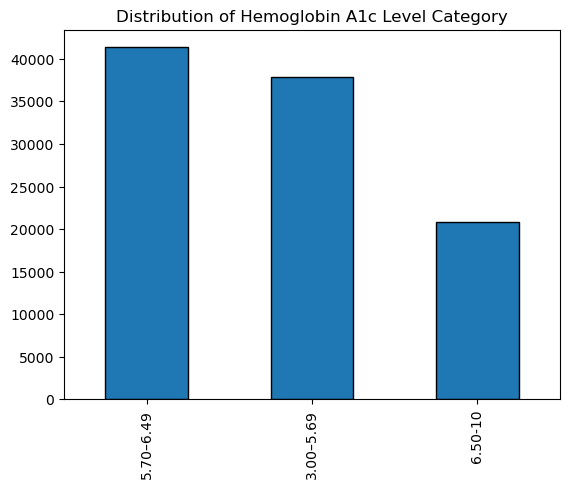

In [60]:
HbA1c_level_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Hemoglobin A1c Level Category');

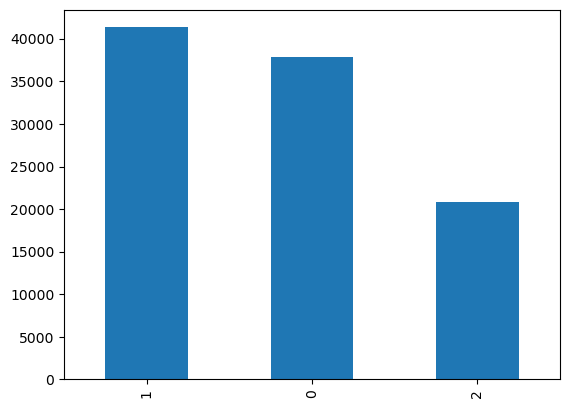

In [61]:
# Check against encoded values.
data_encoded.HbA1c_level_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `HbA1c_level` and `HbA1c_level_group` variables

In [62]:
data_encoded.drop(['HbA1c_level', 'HbA1c_level_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Female',
 'gender_Male',
 'hypertension',
 'heart_disease',
 'smoking_history_non_smoker',
 'smoking_history_undeclared',
 'smoking_history_smoker',
 'smoking_history_former_smoker',
 'blood_glucose_level',
 'diabetes',
 'age_group_encoded',
 'bmi_group_encoded',
 'HbA1c_level_group_encoded']

In [63]:
data_encoded.head(5)

,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,blood_glucose_level,diabetes,age_group_encoded,bmi_group_encoded,HbA1c_level_group_encoded
0,1,0,False,True,1,0,0,0,140,False,3,2,2
1,1,0,False,False,0,1,0,0,80,False,2,2,2
2,0,1,False,False,1,0,0,0,158,False,1,2,1
3,1,0,False,False,0,0,1,0,155,False,1,1,0
4,0,1,True,True,0,0,1,0,155,False,3,1,0


## Discretize `blood_glucose_level` into bins

In [64]:
data_encoded.blood_glucose_level.describe()

count    99982.000000
mean       138.057810
std         40.709469
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

In [65]:
# Define age bins and labels.

bins = [80, 160, 200, 301]
labels = ['80–159', '160–199', '200-300']

# Perform binning using bin list.

data_encoded['blood_glucose_level_group'] = pd.cut(data_encoded['blood_glucose_level'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['blood_glucose_level_group_encoded'] = data_encoded['blood_glucose_level_group'].cat.codes

In [66]:
blood_glucose_level_vars = ['blood_glucose_level_group_encoded', 'blood_glucose_level_group', 'blood_glucose_level']

data_encoded[blood_glucose_level_vars].sample(10)

,blood_glucose_level_group_encoded,blood_glucose_level_group,blood_glucose_level
2804,1,160–199,160
19258,2,200-300,200
62124,0,80–159,80
45887,0,80–159,100
38648,0,80–159,155
64825,0,80–159,85
27030,0,80–159,126
8504,0,80–159,140
73283,2,200-300,200
9235,0,80–159,90


## Plot the new distribution of `blood_glucose_level`

In [67]:
blood_glucose_level_dist = data_encoded.blood_glucose_level_group.value_counts()

blood_glucose_level_dist

80–159     81398
200-300    10876
160–199     7708
Name: blood_glucose_level_group, dtype: int64

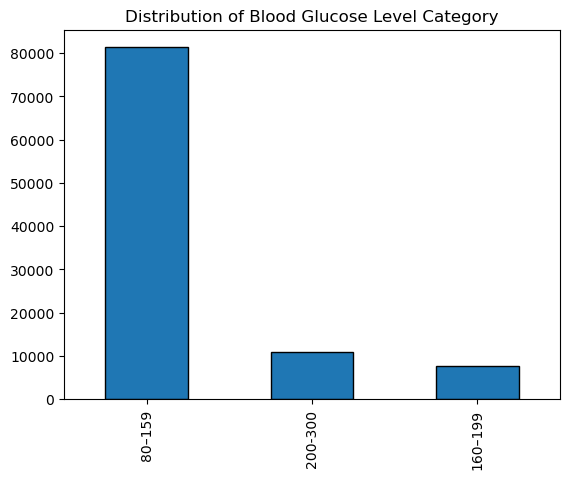

In [68]:
blood_glucose_level_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Blood Glucose Level Category');

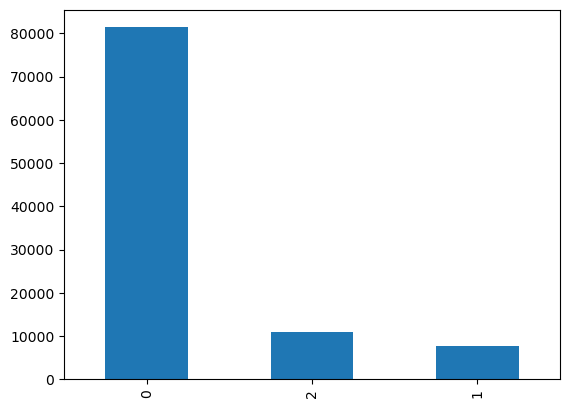

In [69]:
# Check against encoded values.
data_encoded.blood_glucose_level_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `blood_glucose_level` and `blood_glucose_level_group` variables

In [70]:
data_encoded.drop(['blood_glucose_level', 'blood_glucose_level_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Female',
 'gender_Male',
 'hypertension',
 'heart_disease',
 'smoking_history_non_smoker',
 'smoking_history_undeclared',
 'smoking_history_smoker',
 'smoking_history_former_smoker',
 'diabetes',
 'age_group_encoded',
 'bmi_group_encoded',
 'HbA1c_level_group_encoded',
 'blood_glucose_level_group_encoded']

In [71]:
data_encoded.head(5)

,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,diabetes,age_group_encoded,bmi_group_encoded,HbA1c_level_group_encoded,blood_glucose_level_group_encoded
0,1,0,False,True,1,0,0,0,False,3,2,2,0
1,1,0,False,False,0,1,0,0,False,2,2,2,0
2,0,1,False,False,1,0,0,0,False,1,2,1,0
3,1,0,False,False,0,0,1,0,False,1,1,0,0
4,0,1,True,True,0,0,1,0,False,3,1,0,0


# Target Variable Exploration and Data Splitting

## Explore the distribution of the target variable

In [72]:
data_encoded["diabetes"]

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: diabetes, Length: 99982, dtype: bool

In [73]:
data_encoded["diabetes"].value_counts(normalize = True)

False    0.914985
True     0.085015
Name: diabetes, dtype: float64

## Split the data into target and features

In [74]:
target_data = data_encoded["diabetes"]
features = data_encoded.drop(["diabetes"], axis = 1)

## Split the data into train and test sets

In [75]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target_data,
                                                    test_size = 0.3)

In [76]:
print('Training data features: ', x_train.shape)
print('Training data target:   ', y_train.shape)

Training data features:  (69987, 12)
Training data target:    (69987,)


## Apply oversampling to the data

In [77]:
print('Before oversampling: ', Counter(y_train))

Before oversampling:  Counter({False: 64002, True: 5985})


In [78]:
# Define oversampling strategy.

SMOTE = SMOTE()

# Fit and apply the transform.

x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)
x_train_SMOTE = pd.DataFrame(x_train_SMOTE,
                             columns = x_train.columns)

print('After oversampling: ', Counter(y_train_SMOTE))

After oversampling:  Counter({False: 64002, True: 64002})


## Check the distribution of the test data

In [79]:
# Test data should not be oversampled.

print('Test data features: ', x_test.shape)
print('Test data target:   ', y_test.shape)

Test data features:  (29995, 12)
Test data target:    (29995,)


In [80]:
Counter(y_test)

Counter({False: 27480, True: 2515})

## Normalize the data

In [81]:
norm = MinMaxScaler().fit(x_train_SMOTE)

In [82]:
x_train_norm = norm.transform(x_train_SMOTE)

print('Minimum: ', np.min(x_train_norm))
print('Maximum: ', np.max(x_train_norm))

Minimum:  0.0
Maximum:  1.0


# Model Training (Classification Analysis)

## Train a logistic regression model

In [83]:
logreg = LogisticRegression()
logreg.fit(x_train_norm, y_train_SMOTE)

LogisticRegression()

## Make predictions using the logistic regression model

In [84]:
logreg_y_pred = logreg.predict(x_test) 
print(Counter(logreg_y_pred))

Counter({True: 24854, False: 5141})


In [85]:
results = pd.concat([y_test.iloc[:5], x_test.iloc[:5]], axis = 1)
results.insert(1, 'diabetes_pred', logreg_y_pred[:5])
results

,diabetes,diabetes_pred,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,age_group_encoded,bmi_group_encoded,HbA1c_level_group_encoded,blood_glucose_level_group_encoded
55721,False,False,0,1,False,False,1,0,0,0,1,1,0,0
48601,False,False,1,0,False,False,0,1,0,0,0,2,0,0
60965,False,True,1,0,False,False,1,0,0,0,3,2,2,0
74832,False,True,0,1,False,False,1,0,0,0,2,3,2,0
2596,True,True,1,0,True,True,0,0,0,1,3,3,2,2


## Obtain the logistic regression model's score

In [86]:
accuracy_score(y_test, logreg_y_pred)

0.2552425404234039

## Train a k-nearest neighbor (k-NN) model

In [87]:
knn = KNeighborsClassifier()
knn.fit(x_train_norm, y_train_SMOTE)

KNeighborsClassifier()

## Make predictions using the k-NN model

In [88]:
knn_y_pred = knn.predict(x_test)
print(Counter(knn_y_pred))

Counter({False: 23782, True: 6213})


In [89]:
results['diabetes_pred'] = knn_y_pred[:5]
results

,diabetes,diabetes_pred,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,age_group_encoded,bmi_group_encoded,HbA1c_level_group_encoded,blood_glucose_level_group_encoded
55721,False,False,0,1,False,False,1,0,0,0,1,1,0,0
48601,False,False,1,0,False,False,0,1,0,0,0,2,0,0
60965,False,False,1,0,False,False,1,0,0,0,3,2,2,0
74832,False,True,0,1,False,False,1,0,0,0,2,3,2,0
2596,True,True,1,0,True,True,0,0,0,1,3,3,2,2


## Obtain the k-NN model's score

In [90]:
accuracy_score(y_test, knn_y_pred)

0.8275712618769795

## Train a support-vector machine (SVM) model

In [91]:
svm = SVC()
svm.fit(x_train_norm, y_train_SMOTE)

SVC()

## Make predictions using the SVM model

In [92]:
svm_y_pred = svm.predict(x_test)
print(Counter(svm_y_pred))

Counter({False: 22375, True: 7620})


In [93]:
results['diabetes_pred'] = svm_y_pred[:5]
results

,diabetes,diabetes_pred,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,age_group_encoded,bmi_group_encoded,HbA1c_level_group_encoded,blood_glucose_level_group_encoded
55721,False,False,0,1,False,False,1,0,0,0,1,1,0,0
48601,False,False,1,0,False,False,0,1,0,0,0,2,0,0
60965,False,False,1,0,False,False,1,0,0,0,3,2,2,0
74832,False,False,0,1,False,False,1,0,0,0,2,3,2,0
2596,True,False,1,0,True,True,0,0,0,1,3,3,2,2


## Obtain the SVM model's score

In [94]:
accuracy_score(y_test, svm_y_pred)

0.6677112852142024

## Train a decision tree model

In [95]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

## Make predictions using the decision tree model

In [96]:
clf_tree_y_pred = clf_tree.predict(x_test)
print(Counter(clf_tree_y_pred))

Counter({False: 23217, True: 6778})


In [97]:
results['diabetes_pred'] = clf_tree_y_pred[:5]
results

,diabetes,diabetes_pred,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,age_group_encoded,bmi_group_encoded,HbA1c_level_group_encoded,blood_glucose_level_group_encoded
55721,False,False,0,1,False,False,1,0,0,0,1,1,0,0
48601,False,False,1,0,False,False,0,1,0,0,0,2,0,0
60965,False,True,1,0,False,False,1,0,0,0,3,2,2,0
74832,False,True,0,1,False,False,1,0,0,0,2,3,2,0
2596,True,True,1,0,True,True,0,0,0,1,3,3,2,2


## Obtain the decision tree model's score

In [98]:
accuracy_score(y_test, clf_tree_y_pred)

0.8312052008668112

## Visualize the decision tree

In [99]:
text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- class: False
|--- feature_10 >  0.50
|   |--- feature_8 <= 1.50
|   |   |--- feature_11 <= 1.50
|   |   |   |--- feature_9 <= 2.50
|   |   |   |   |--- feature_10 <= 1.50
|   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.5

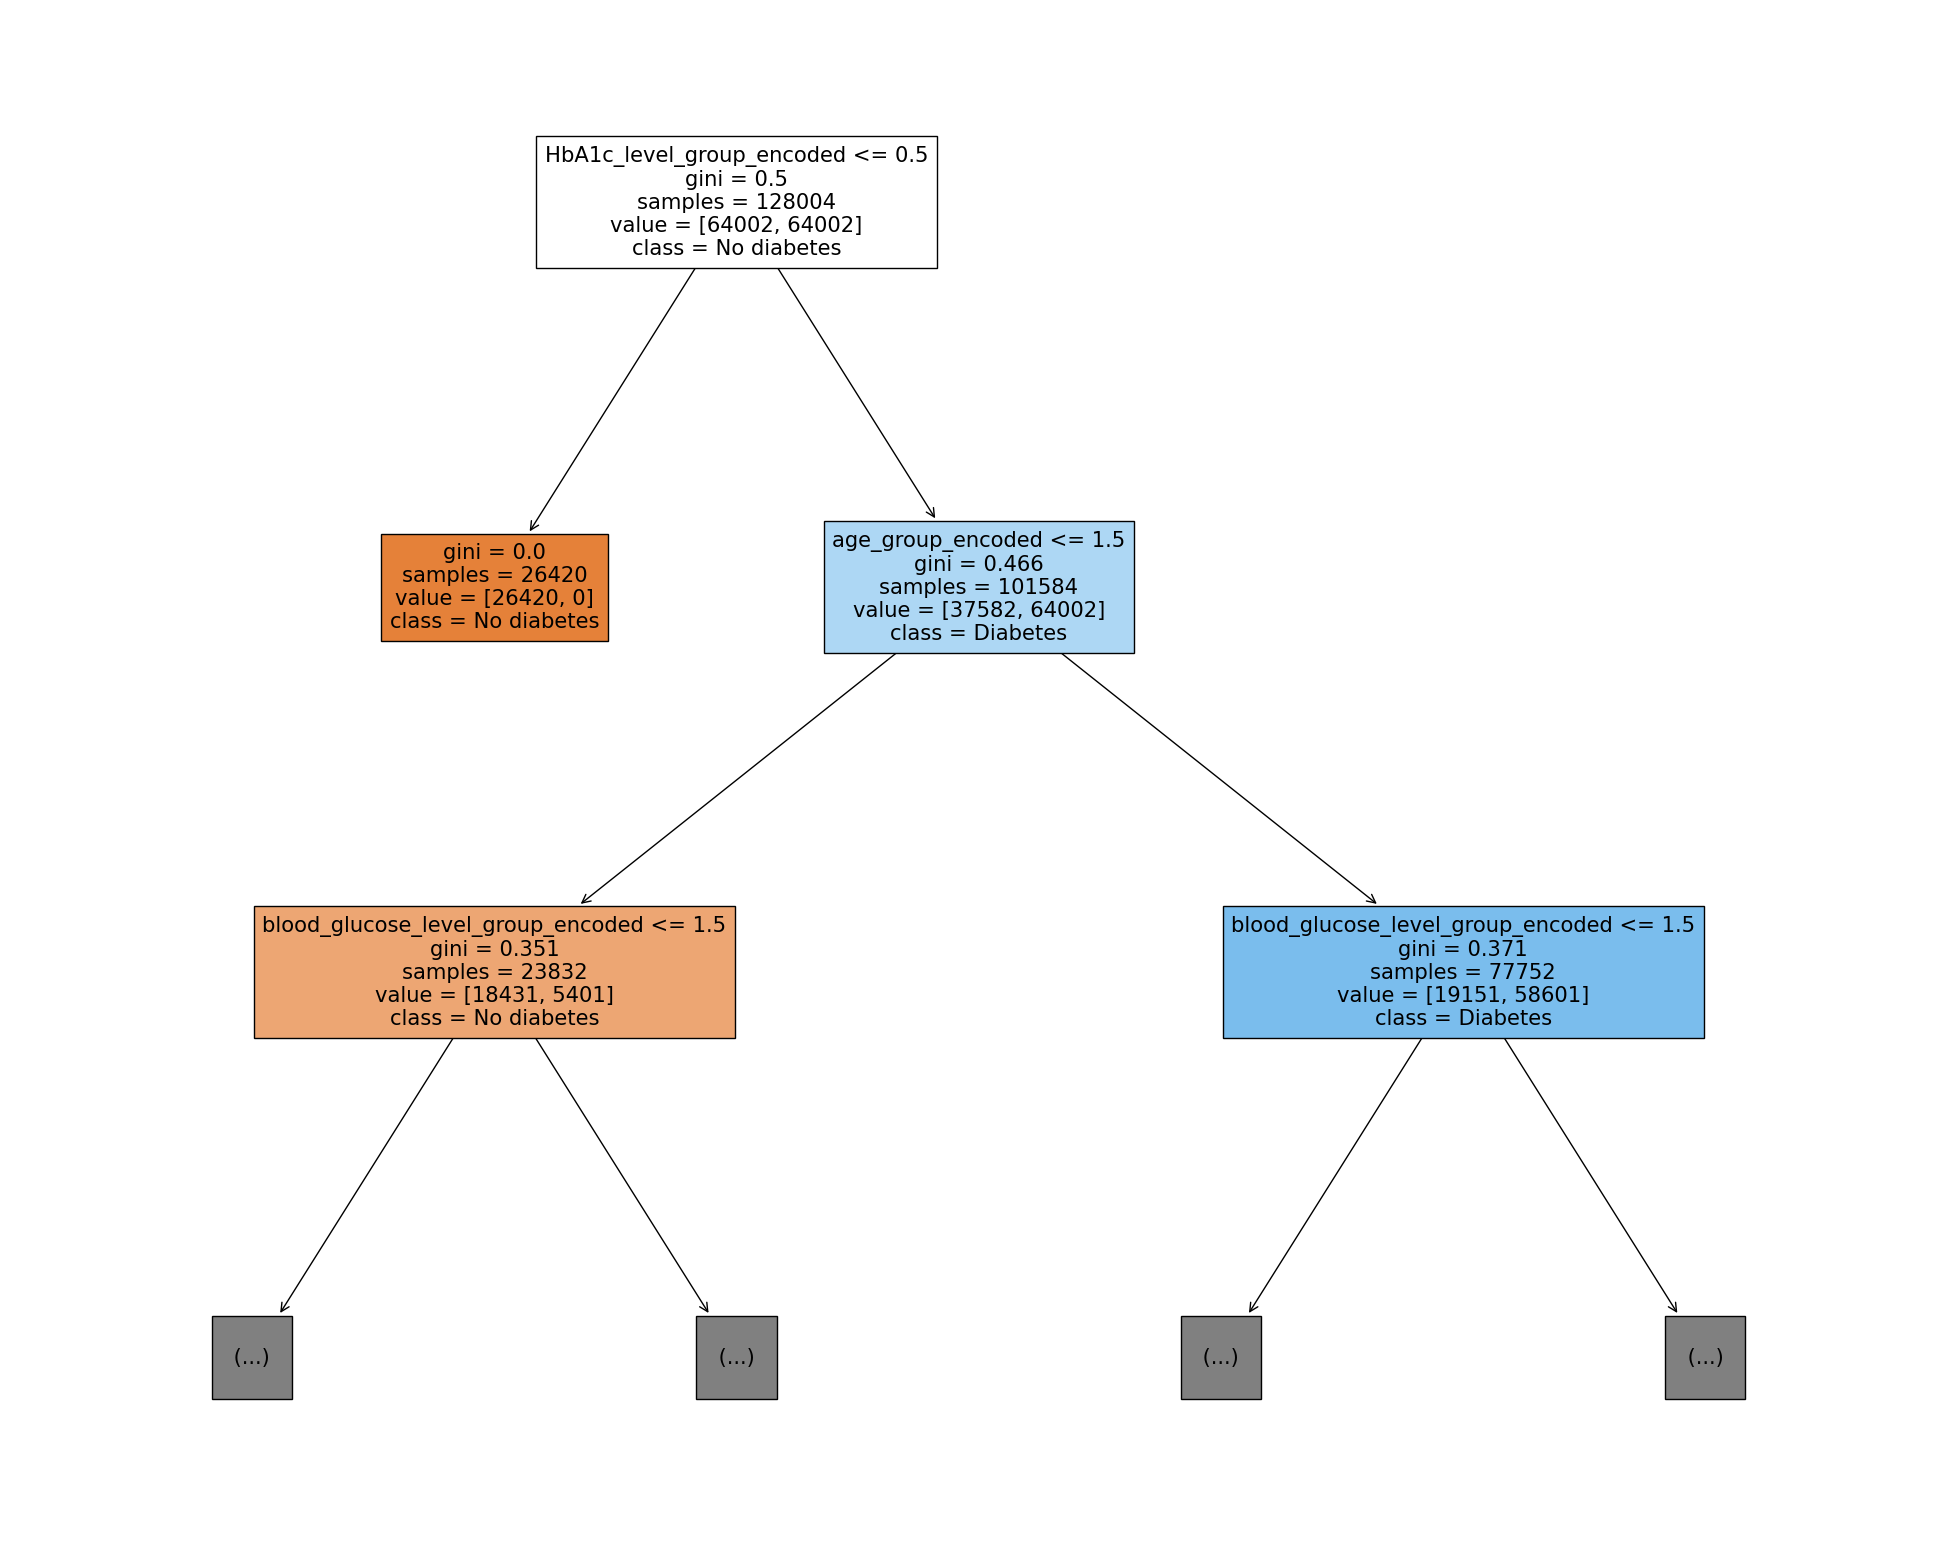

In [100]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(x_train.columns),  
                   class_names = ['No diabetes', 'Diabetes'],
                   max_depth = 2,
                   filled = True)

## Train a random forest model

In [101]:
rf = RandomForestClassifier()
rf.fit(x_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

## Make predictions using the random forest model

In [102]:
rf_y_pred = rf.predict(x_test)
print(Counter(rf_y_pred))

Counter({False: 23181, True: 6814})


In [103]:
results['diabetes_pred'] = rf_y_pred[:5]
results

,diabetes,diabetes_pred,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,age_group_encoded,bmi_group_encoded,HbA1c_level_group_encoded,blood_glucose_level_group_encoded
55721,False,False,0,1,False,False,1,0,0,0,1,1,0,0
48601,False,False,1,0,False,False,0,1,0,0,0,2,0,0
60965,False,True,1,0,False,False,1,0,0,0,3,2,2,0
74832,False,True,0,1,False,False,1,0,0,0,2,3,2,0
2596,True,True,1,0,True,True,0,0,0,1,3,3,2,2


## Obtain the random forest model's score

In [104]:
accuracy_score(y_test, rf_y_pred)

0.831271878646441

## Train a gradient boosting model

In [105]:
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(x_train_SMOTE, y_train_SMOTE)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Make predictions using the gradient boosting model

In [106]:
xgb_y_pred = xgb.predict(x_test)
print(Counter(xgb_y_pred))

Counter({0: 22929, 1: 7066})


In [107]:
results['diabetes_pred'] = xgb_y_pred[:5]
results

,diabetes,diabetes_pred,gender_Female,gender_Male,hypertension,heart_disease,smoking_history_non_smoker,smoking_history_undeclared,smoking_history_smoker,smoking_history_former_smoker,age_group_encoded,bmi_group_encoded,HbA1c_level_group_encoded,blood_glucose_level_group_encoded
55721,False,0,0,1,False,False,1,0,0,0,1,1,0,0
48601,False,0,1,0,False,False,0,1,0,0,0,2,0,0
60965,False,1,1,0,False,False,1,0,0,0,3,2,2,0
74832,False,1,0,1,False,False,1,0,0,0,2,3,2,0
2596,True,1,1,0,True,True,0,0,0,1,3,3,2,2


## Obtain the gradient boosting model's score

In [108]:
accuracy_score(y_test, xgb_y_pred)

0.8267377896316053

## Compare evaluation metrics for each model

In [109]:
models = ['Logistic Regression', 'SVM', 'k-NN',
          'Decision Tree', 'Random Forest', 'XGBoost']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

pred_list = ['logreg_y_pred', 'svm_y_pred', 'knn_y_pred',
             'clf_tree_y_pred','rf_y_pred', 'xgb_y_pred']

scores = np.empty((0, 4))

for i in pred_list:
    scores = np.append(scores,
                       np.array([[accuracy_score(y_test, globals()[i]),
                                  precision_score(y_test, globals()[i]),
                                  recall_score(y_test, globals()[i]),
                                  f1_score(y_test, globals()[i])]]),
                       axis = 0)

scores = np.around(scores, 4)

scoring_df = pd.DataFrame(scores, index = models, columns = metrics)
scoring_df.sort_values(by = 'F1', ascending = False)

,Accuracy,Precision,Recall,F1
XGBoost,0.8267,0.3102,0.8716,0.4576
Random Forest,0.8313,0.3132,0.8485,0.4575
Decision Tree,0.8312,0.3120,0.8410,0.4552
k-NN,0.8276,0.2862,0.7070,0.4074
Logistic Regression,0.2552,0.1012,1.0000,0.1838
SVM,0.6677,0.0110,0.0334,0.0166


## Generate a confusion matrix

In [110]:
confusion_matrix(y_test, xgb_y_pred) 

array([[22606,  4874],
       [  323,  2192]], dtype=int64)

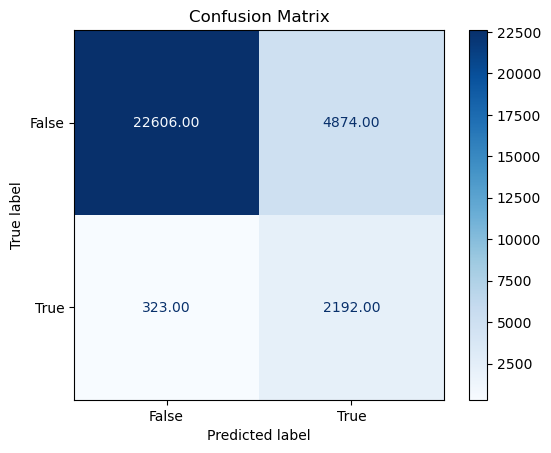

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming xgb_y_pred is the predicted labels and y_test is the true labels

# Calculate confusion matrix
cm = confusion_matrix(y_test, xgb_y_pred)

# Get unique class labels
class_labels = sorted(set(y_test) | set(xgb_y_pred))

# Display confusion matrix with a specific colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")

# Customize plot if needed
disp.ax_.set_title("Confusion Matrix")

# Show the plot
plt.show()


## Plot a ROC curve

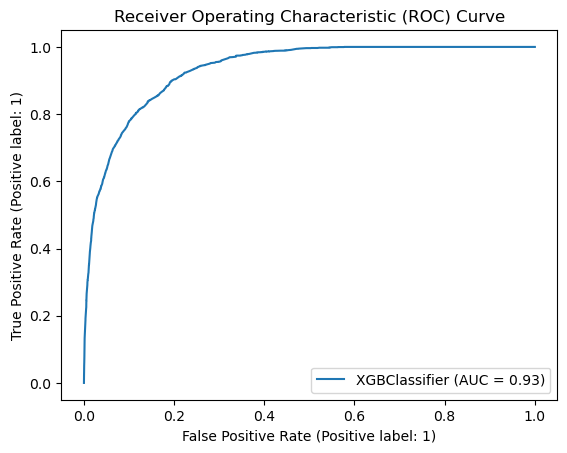

In [112]:
from sklearn.metrics import RocCurveDisplay

# Create a ROC curve display
roc_display = RocCurveDisplay.from_estimator(xgb, x_test, y_test)

# Customize the plot if needed
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

## Plot a precision–recall curve

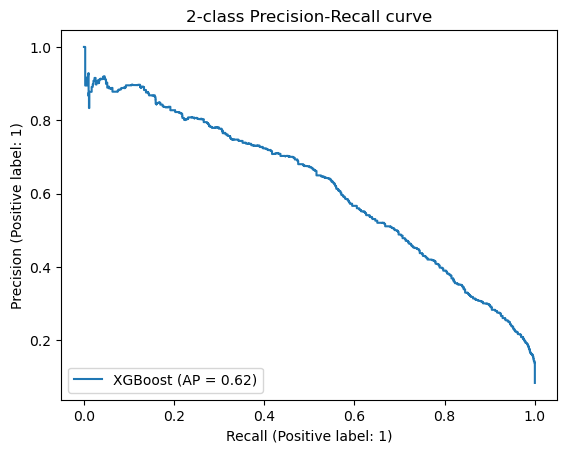

In [113]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    xgb, x_test, y_test, name="XGBoost"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Generate a feature importance plot

In [114]:
def feature_importance_plot(model, x_train, n):
    """Plots feature importance. Only works for ensemble learning."""
    plt.figure(figsize = (8, 5))
    feat_importances = pd.Series(model.feature_importances_,
                                 index = x_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

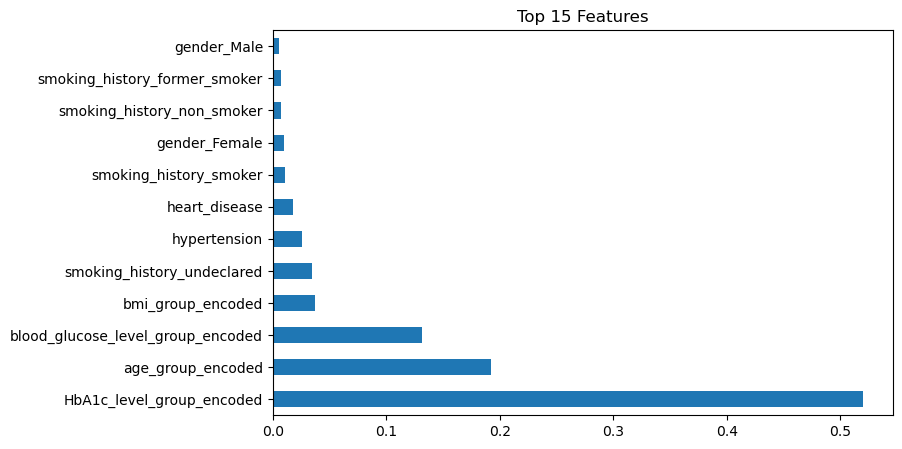

In [115]:
feature_importance_plot(xgb, x_train_SMOTE, 15)

## Plot learning curves

In [116]:
def plot_learning_curves(model, x_train, y_train):
    """Plots learning curves for model validation."""
    plt.figure(figsize = (5, 5))
    train_sizes, train_scores, test_scores = \
    learning_curve(model, x_train, y_train, cv = 5,
                   scoring = 'accuracy', n_jobs = -1,
                   shuffle = True,
                   train_sizes = np.linspace(0.01, 1.0, 5))
        
    # Means of training and test set scores.
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Draw lines.
    plt.plot(train_sizes, train_mean, '--',
             color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean,
             color = '#111111', label = 'Cross-validation score')

    # Create plot.
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
    plt.tight_layout()

    plt.show()

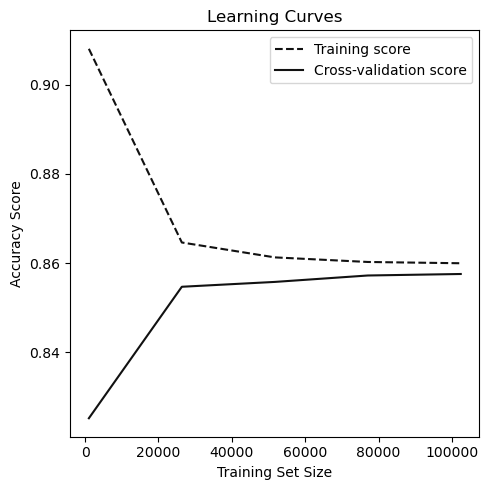

In [117]:
plot_learning_curves(xgb, x_train_SMOTE, y_train_SMOTE)